In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('.\Iris.csv')#uploading the datasets

In [3]:
df.info()#General info about the data sets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#checking null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
print(df['Species'].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [8]:

df.drop(columns=['Id'], inplace=True)


In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### EDA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

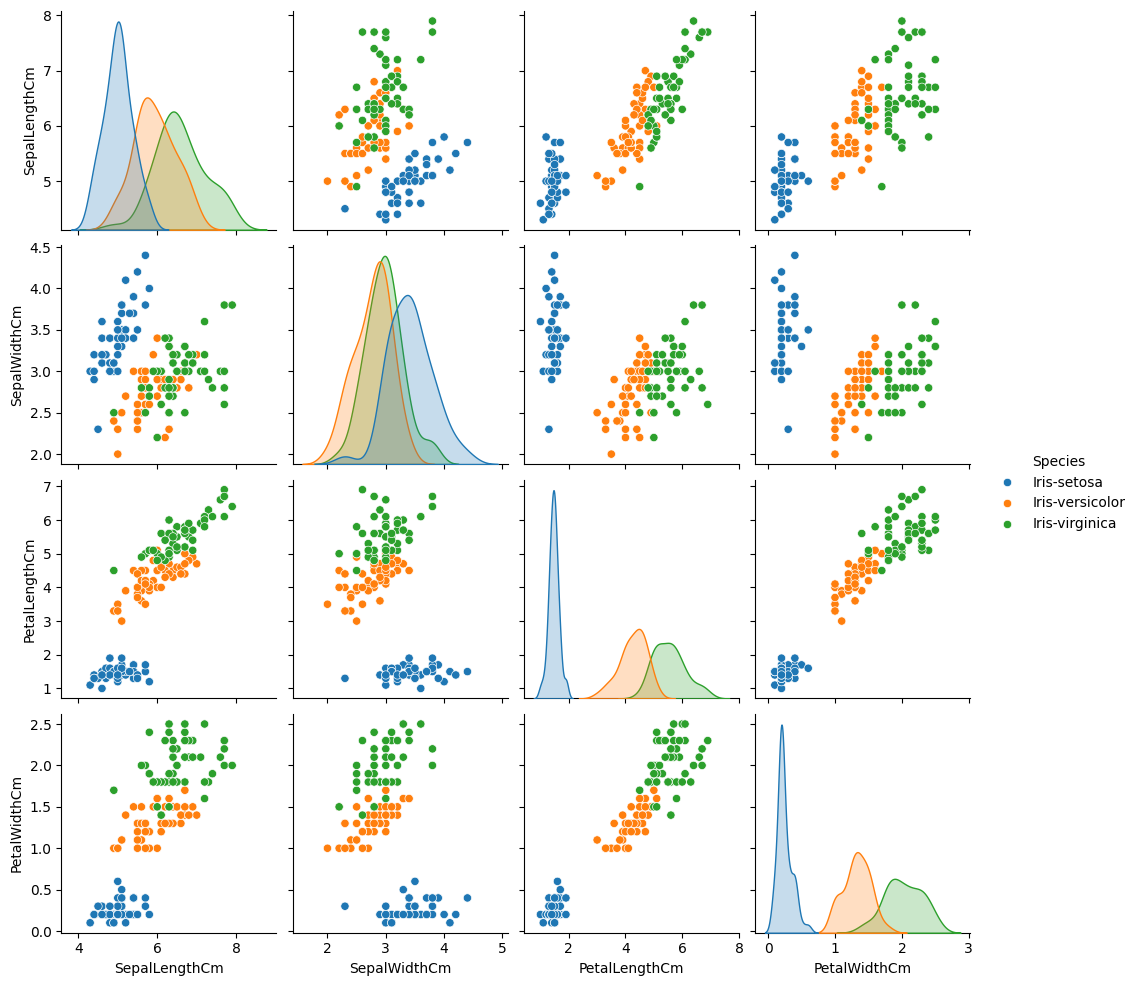

In [11]:
sns.pairplot(df, hue='Species')
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder


# Encoding the species col
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

print(df.head())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0


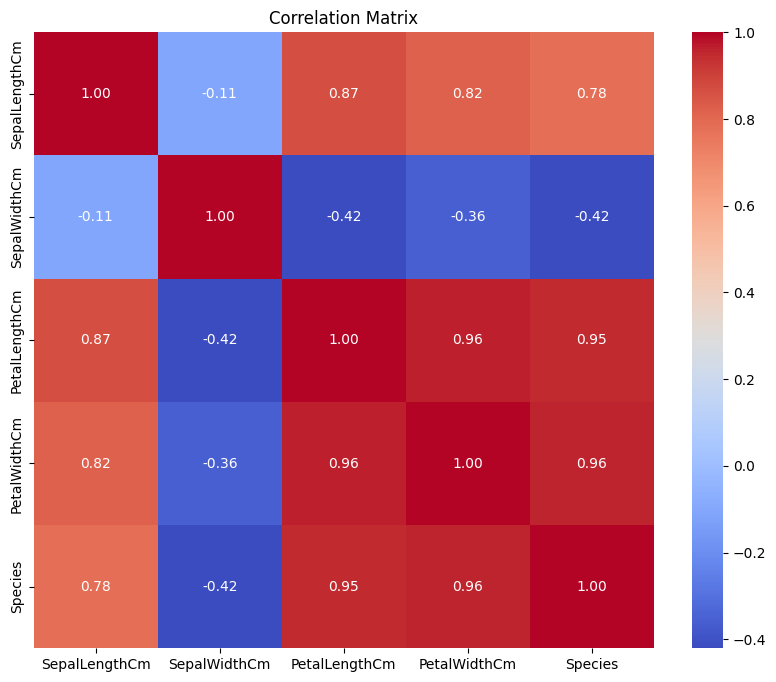

In [13]:
# Visualizing correlations between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

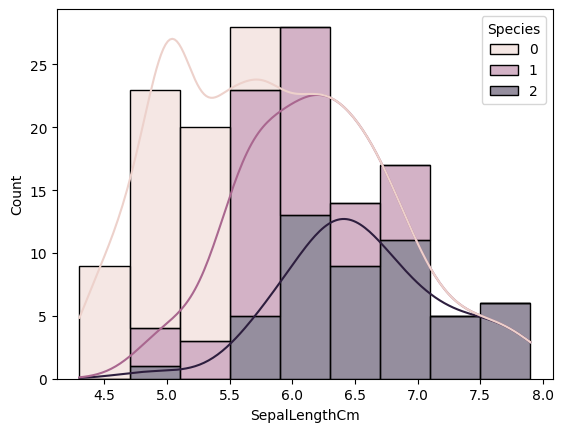

In [14]:
sns.histplot(data=df, x='SepalLengthCm', kde=True, hue='Species', multiple='stack')
plt.show()


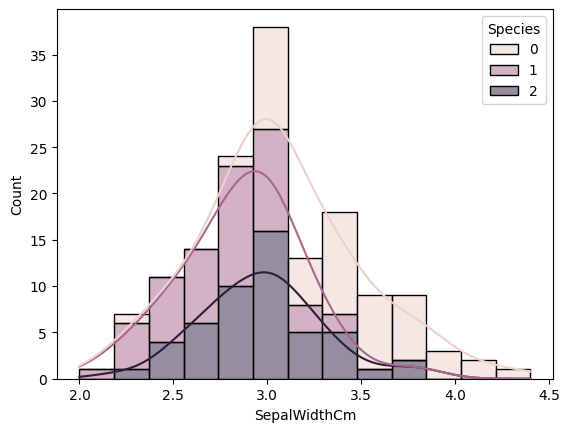

In [15]:
sns.histplot(data=df, x='SepalWidthCm', kde=True, hue='Species', multiple='stack')
plt.show()


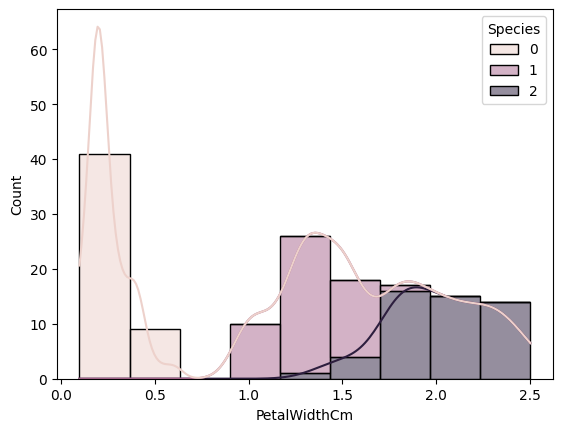

In [16]:
sns.histplot(data=df, x='PetalWidthCm', kde=True, hue='Species', multiple='stack')
plt.show()


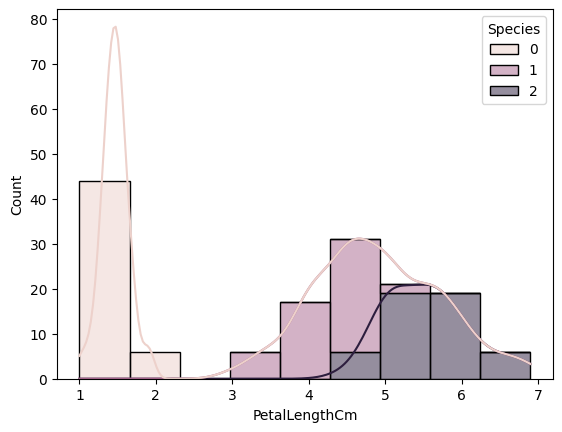

In [17]:
sns.histplot(data=df, x='PetalLengthCm', kde=True, hue='Species', multiple='stack')
plt.show()


### MODEL

In [18]:


# Features: Sepal Length, Sepal Width, Petal Length, Petal Width
features = df[['PetalLengthCm', 'PetalWidthCm', 'SepalWidthCm', 'SepalLengthCm']]

# Target Variable: Species
target = df['Species']

print("Features:")
print(features.head())

print("\nTarget:")
print(target.head())


Features:
   PetalLengthCm  PetalWidthCm  SepalWidthCm  SepalLengthCm
0            1.4           0.2           3.5            5.1
1            1.4           0.2           3.0            4.9
2            1.3           0.2           3.2            4.7
3            1.5           0.2           3.1            4.6
4            1.4           0.2           3.6            5.0

Target:
0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [22]:

X = df[['PetalLengthCm', 'PetalWidthCm', 'SepalWidthCm', 'SepalLengthCm']]
y = df['Species']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
logreg_classifier = LogisticRegression(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

In [25]:
logreg_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred = logreg_classifier.predict(X_test)
y_pred = rf_classifier.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [28]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Hyperparameter tuning using GridSearchCV for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid_search = GridSearchCV(rf_classifier, param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

# Hyperparameter tuning using GridSearchCV for Logistic Regression
logreg_param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
logreg_grid_search = GridSearchCV(logreg_classifier, param_grid=logreg_param_grid, cv=5)
logreg_grid_search.fit(X_train, y_train)


C:\Users\mohan\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mohan\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

In [30]:
# Evaluating Random Forest classifier
rf_best_model = rf_grid_search.best_estimator_
rf_pred = rf_best_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 1.0
Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [31]:
# Evaluating Logistic Regression classifier
logreg_best_model = logreg_grid_search.best_estimator_
logreg_pred = logreg_best_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("\nLogistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Best Parameters:", logreg_grid_search.best_params_)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logreg_pred))


Logistic Regression Accuracy: 1.0
Logistic Regression Best Parameters: {'C': 1, 'penalty': 'l2'}

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

